# Model Building and training

## 1.1 Import required packages:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Modelling packages
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import *
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


Note:
- we install some libraries not in my environment later we put into those packages into "requirements.txt" it will take care of it. (pip install <'package_name'>)

Import datasets

In [4]:
df = pd.read_csv(r'E:\Performance_of_student\src\notebook\Data\stud.csv')


In [5]:
# Top 5 records

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Split independent(X) and dependent variables(Y)

### Adding two features like Total_score and Average

In [6]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['avg_score']=round(df['total_score']/3,2)

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


- Independent variables (X):- Except avg_score taken has dependent variable.

In [8]:
X=df.drop(columns=['avg_score'],axis=1)

In [9]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [10]:
for i in df.columns[:5]:
    print("categories in ",i,"variable :  ",df[i].unique())
    print()

categories in  gender variable :   ['female' 'male']

categories in  race_ethnicity variable :   ['group B' 'group C' 'group A' 'group D' 'group E']

categories in  parental_level_of_education variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

categories in  lunch variable :   ['standard' 'free/reduced']

categories in  test_preparation_course variable :   ['none' 'completed']



In [11]:
y=df['avg_score']

In [12]:
y

0      72.67
1      82.33
2      92.67
3      49.33
4      76.33
       ...  
995    94.00
996    57.33
997    65.00
998    74.33
999    83.00
Name: avg_score, Length: 1000, dtype: float64

In [13]:
numerical_fea=X.select_dtypes(exclude='object').columns
categorical_fea=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

# For numerical features no need to apply any conversion method so we apply Standardscaler()
num_transform=StandardScaler()
one_hot=OneHotEncoder()

preprocessor=ColumnTransformer(
                [
    ("OneHotEncoder",one_hot,categorical_fea),
    ("StandardScaler",num_transform,numerical_fea)
                ]
    )

In [14]:
X=preprocessor.fit_transform(X)

In [15]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.19399858,
         0.39149181,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.42747598,
         1.31326868,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.77010859,
         1.64247471,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.12547206,
        -0.20107904, -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  0.60515772,
         0.58901542,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  1.15336989,
         1.18158627,  1.06871048]])

In [16]:
X.shape

(1000, 21)

In [17]:
# Applying train_test_split in the datasets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 21), (200, 21))

Create a function with all metrics after the model trains.

In [18]:
def model_evaluation(actual,predicted):
    mae=mean_absolute_error(actual,predicted)
    mse=mean_squared_error(actual,predicted)
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    r2_square=r2_score(actual,predicted)
    return mae,mse,rmse,r2_square

In [19]:
models={
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbours Regressor" : KNeighborsRegressor(),
    "Decision Regressor " : DecisionTreeRegressor(),
    "RandomForestRegressor " : RandomForestRegressor(),
    "XGBRegressor " : XGBRegressor(),
    "Catboosting Regressor " : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor " : AdaBoostRegressor()
}

model_list=[]
r2_list=[]


for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Evaluation train and test datasets.
    
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=model_evaluation(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=model_evaluation(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for training")
    print("- Mean Absolute Error : {:.3f}".format(model_train_mae))
    print("- Mean Square Error : {:.3f}".format(model_train_mse))
    print("- Root Mean Square Error : {:.3f}".format(model_train_rmse))
    print("- R2 Square : {:.3f}".format(model_train_r2))
    
    print("----------------------------------------")
    
    print("Model Performance for testing")
    print("- Mean Absolute Error : {:.3f}".format(model_test_mae))
    print("- Mean Square Error : {:.3f}".format(model_test_mse))
    print("- Root Mean Square Error : {:.3f}".format(model_test_rmse))
    print("- R2 square : {:.3f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print("*"*39)
    print('\n')
    

Linear Regression
Model Performance for training
- Mean Absolute Error : 0.002
- Mean Square Error : 0.000
- Root Mean Square Error : 0.003
- R2 Square : 1.000
----------------------------------------
Model Performance for testing
- Mean Absolute Error : 0.002
- Mean Square Error : 0.000
- Root Mean Square Error : 0.003
- R2 square : 1.000
***************************************


Lasso
Model Performance for training
- Mean Absolute Error : 0.807
- Mean Square Error : 1.018
- Root Mean Square Error : 1.009
- R2 Square : 0.995
----------------------------------------
Model Performance for testing
- Mean Absolute Error : 0.831
- Mean Square Error : 1.115
- Root Mean Square Error : 1.056
- R2 square : 0.995
***************************************


Ridge
Model Performance for training
- Mean Absolute Error : 0.005
- Mean Square Error : 0.000
- Root Mean Square Error : 0.006
- R2 Square : 1.000
----------------------------------------
Model Performance for testing
- Mean Absolute Error : 0

In [20]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name',"R2_Score"]).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
6,XGBRegressor,0.998287
4,Decision Regressor,0.997858
5,RandomForestRegressor,0.996495
7,Catboosting Regressor,0.995055
1,Lasso,0.994799
8,AdaBoost Regressor,0.990873
3,K-Neighbours Regressor,0.966841


## Selected Linear Regression model

In [21]:
linear_model=LinearRegression(fit_intercept=True)
Linear_model=linear_model.fit(X_train,y_train)
y_pred=linear_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the Linear regression model is %.2f "%score)

Accuracy of the Linear regression model is 100.00 


Plot y_pred and y_test:

Text(0, 0.5, 'Predicted')

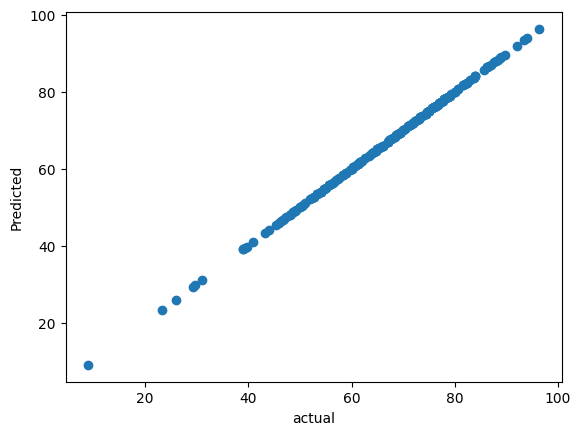

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("Predicted")

<Axes: xlabel='avg_score'>

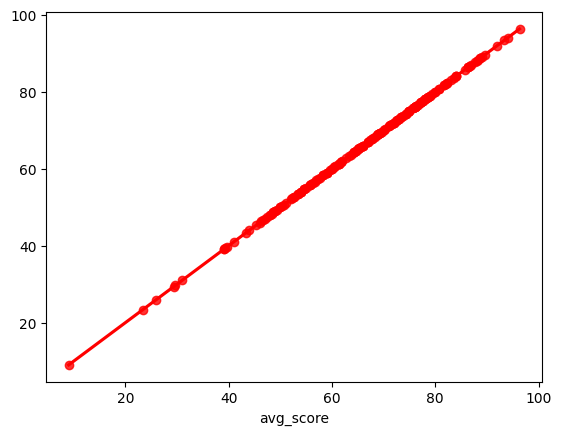

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

Difference Between Actual and Predicted values

In [24]:
pre=pd.DataFrame({'Actual value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
pre

,Actual value,Predicted_value,Difference
521,87.00,87.000336,-0.000336
737,64.00,63.999786,0.000214
740,75.00,75.000510,-0.000510
660,74.67,74.665721,0.004279
411,81.67,81.665739,0.004261
...,...,...,...
408,55.00,55.001104,-0.001104
332,57.00,56.999799,0.000201
208,77.00,76.999847,0.000153
613,72.00,71.999827,0.000173
